# Exploratory Data Analysis (EDA) on Cardiotocographic Dataset

## Objective
The main goal of this analysis is to:
- Understand the dataset structure.
- Perform data cleaning (missing values, duplicates, outliers).
- Generate statistical summaries.
- Visualize key patterns using plots.
- Identify relationships between features.

---


## 1.Data Cleaning and Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load Dataset
data_clean=pd.read_csv("Cardiotocographic.csv")
data_clean.head(5)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


## Data Cleaning
- Convert object columns to numeric (if needed).
- Remove duplicates.
- Handle missing values.
- Outliers detection usig IQR

In [3]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [4]:
data_clean.shape

(2126, 14)

In [6]:
# Convert object columns to numeric (if any)
for col in data_clean.columns:
    if data_clean[col].dtype == "object":
        data_clean[col] = pd.to_numeric(data_clean[col], errors="coerce")


In [7]:
# Check for duplicates data

dups=data_clean.duplicated()
print(f'Number of duplicate rows={dups.sum()}')
data_clean[dups]

Number of duplicate rows=2


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [8]:
data_clean.drop_duplicates(inplace=True)

In [9]:
#data_clean=data.dropna()

In [10]:
data_clean.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [11]:
data_clean.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [12]:
#Find Numerical Column
numerical_col=data_clean.select_dtypes(include=["int64","float64"]).columns
print(numerical_col)

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')


In [13]:
#handle missing values
for col in numerical_col:
    data_clean[col]=data_clean[col].fillna(data_clean[col].median())
    

In [14]:
#Data shape after cleaning
data_clean.shape

(2124, 14)

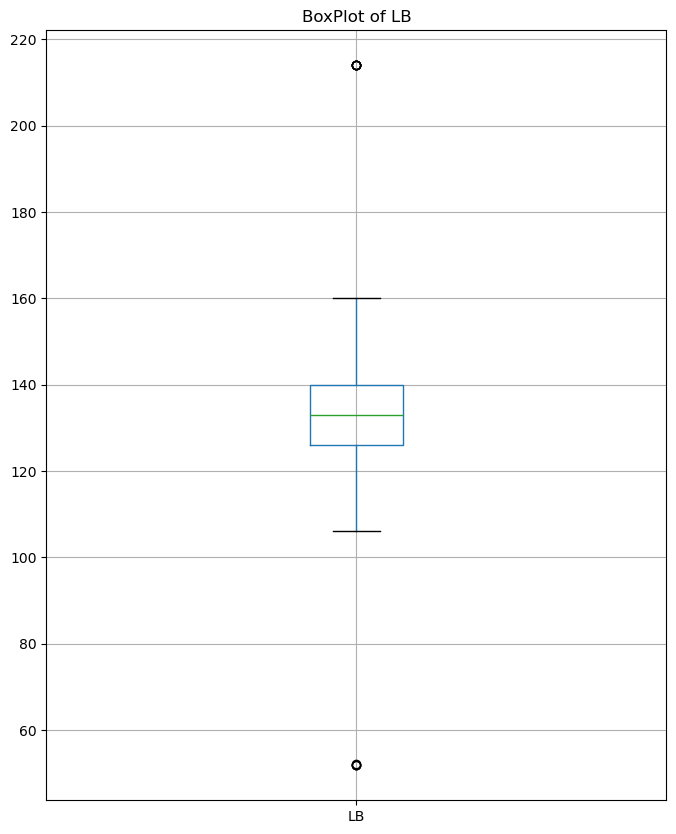

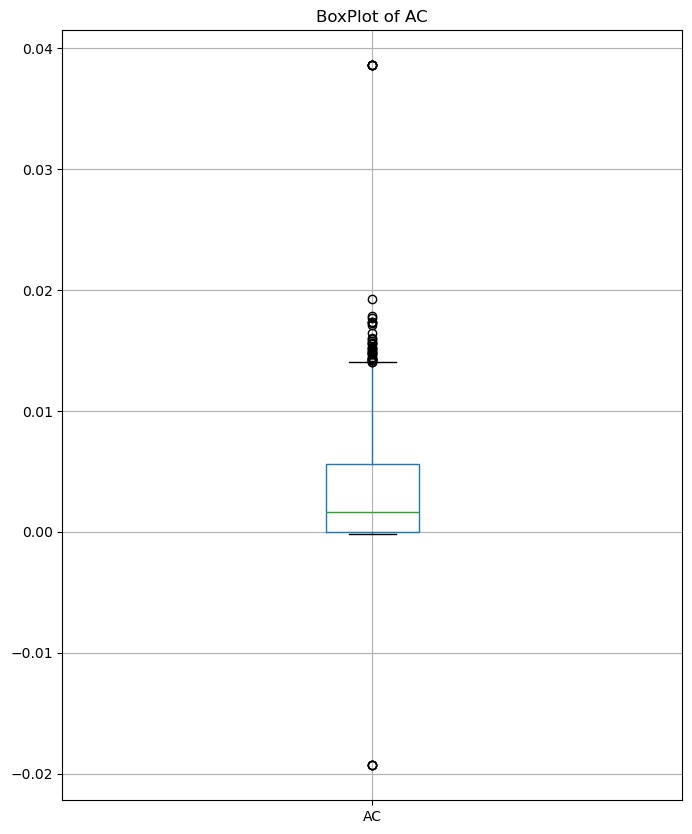

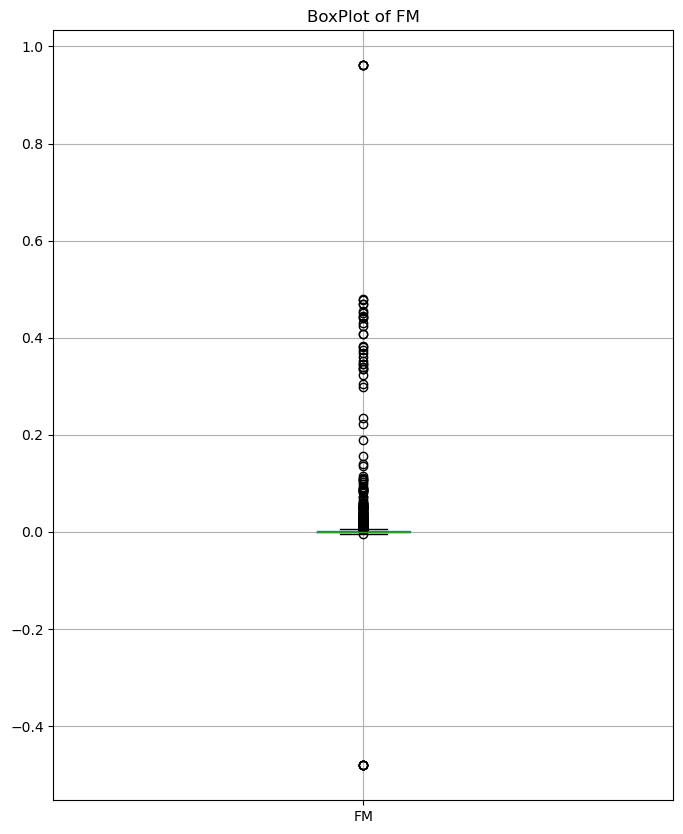

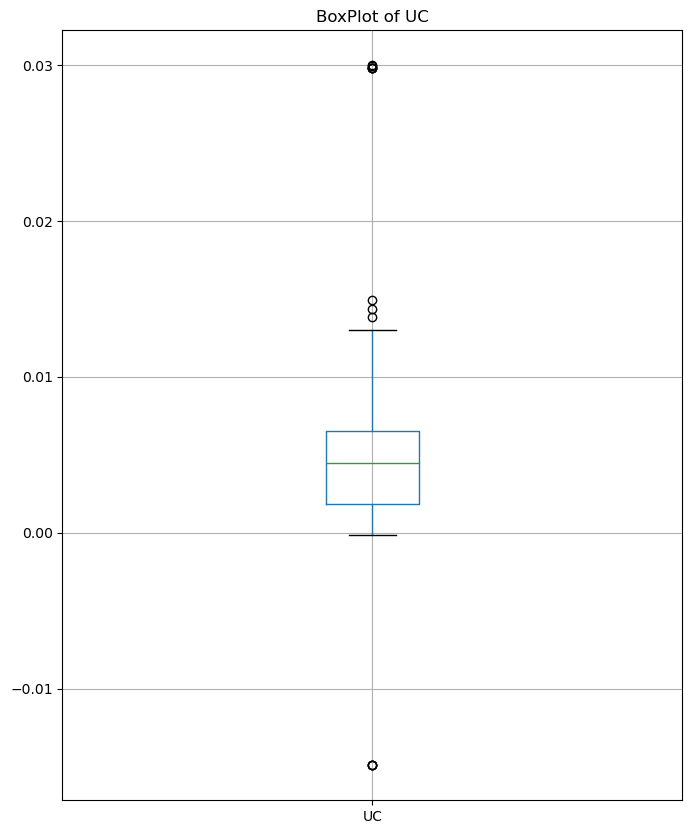

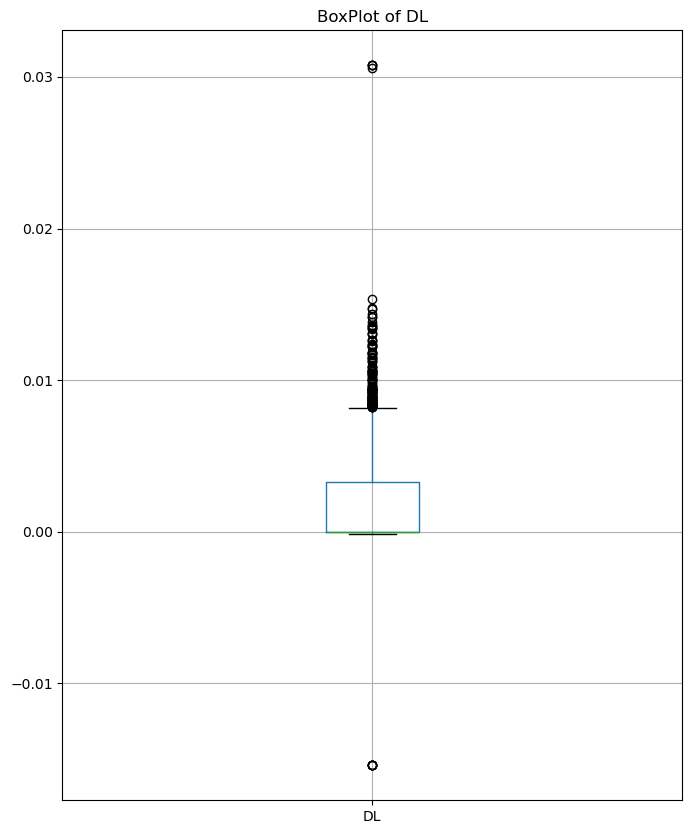

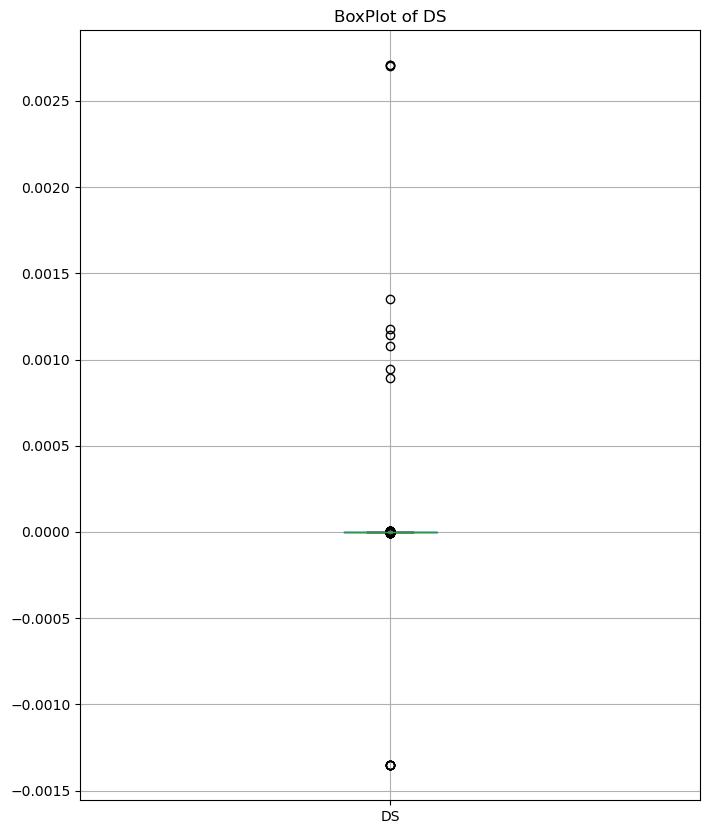

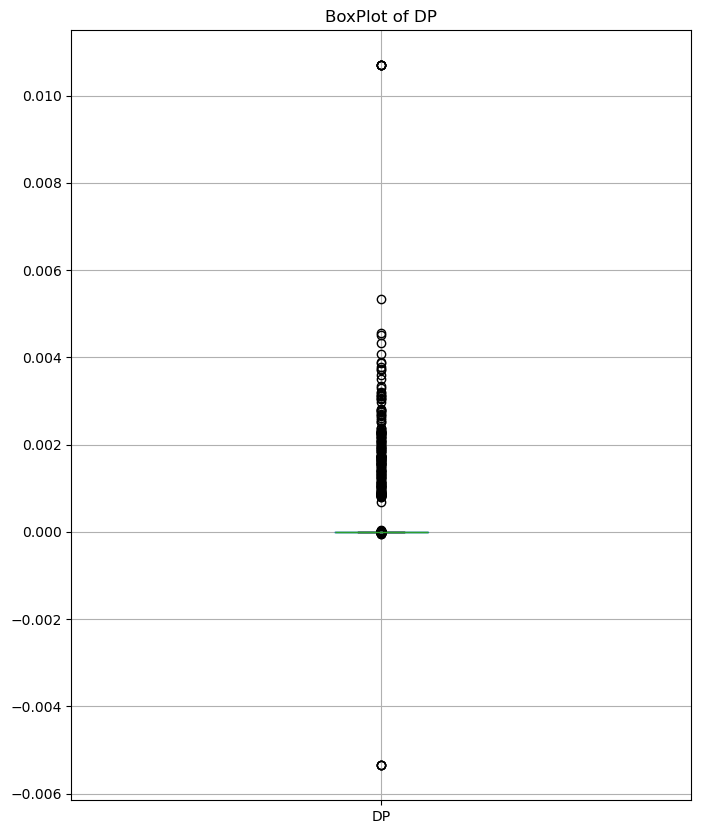

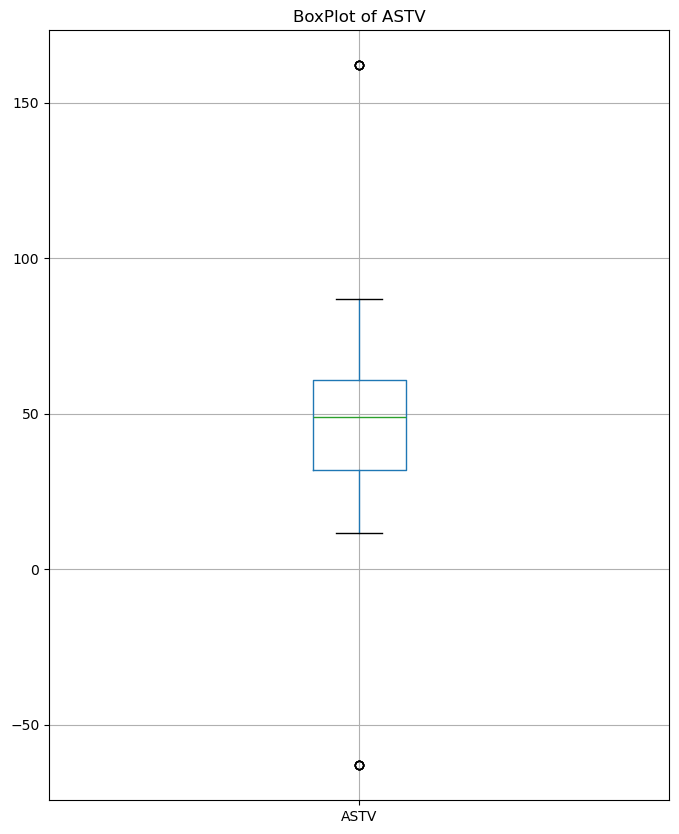

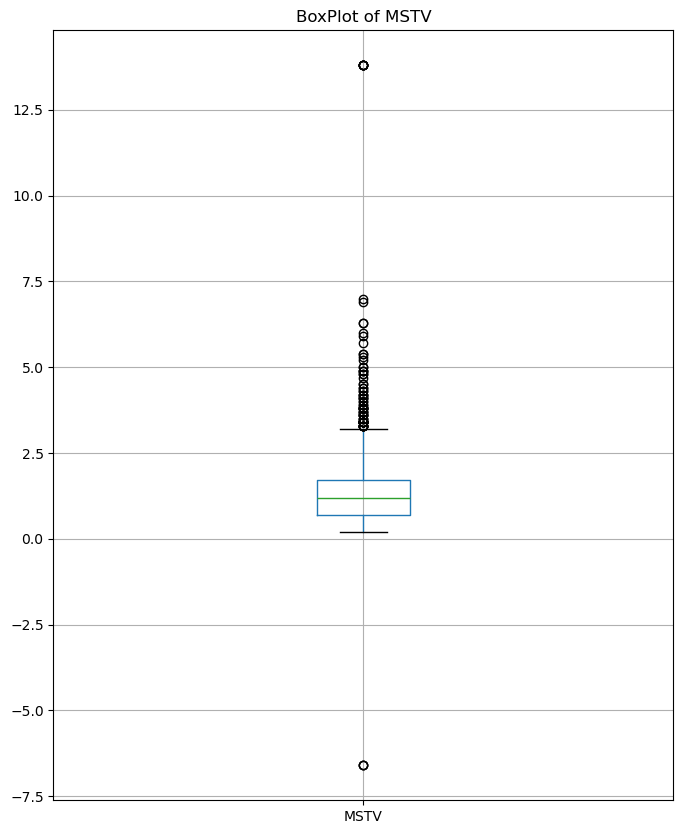

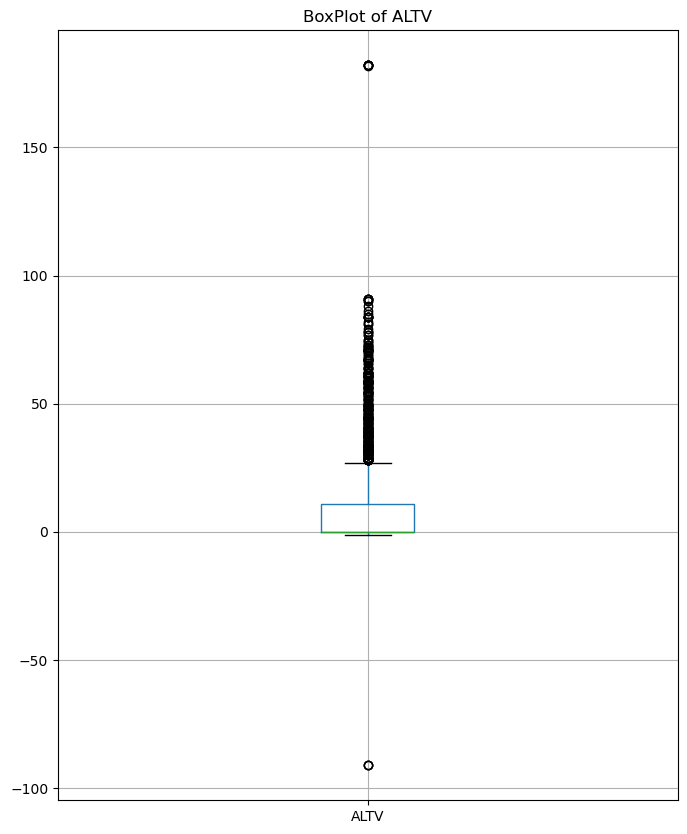

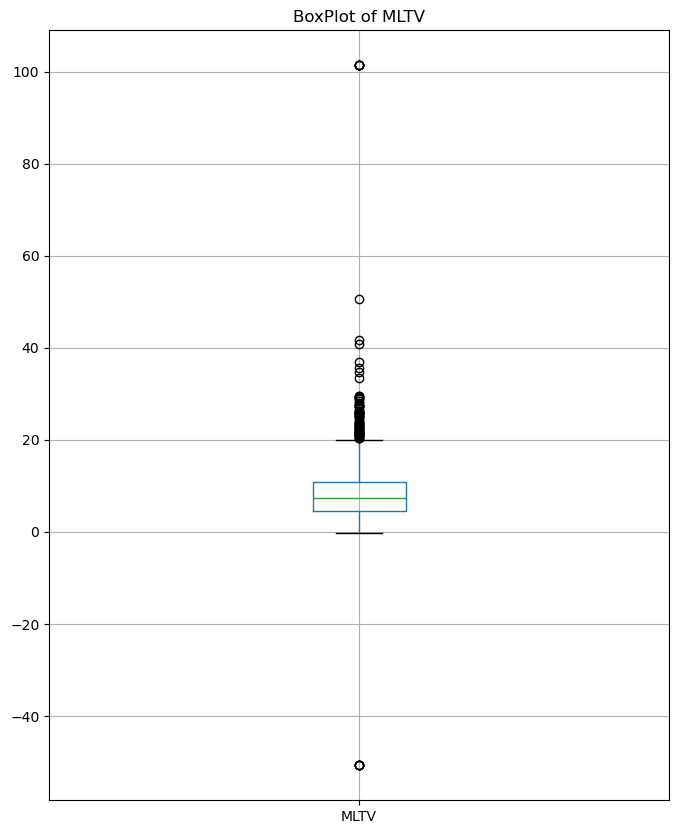

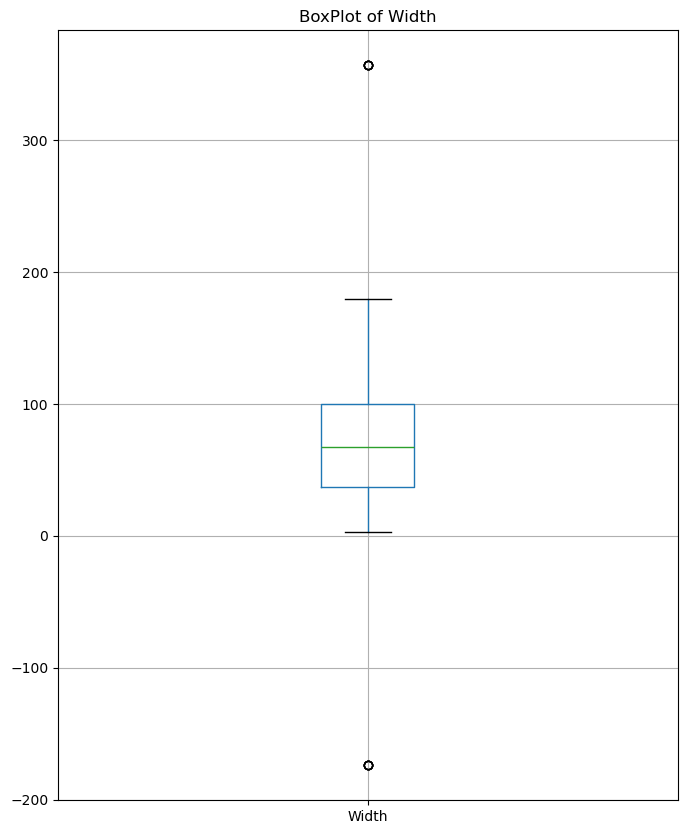

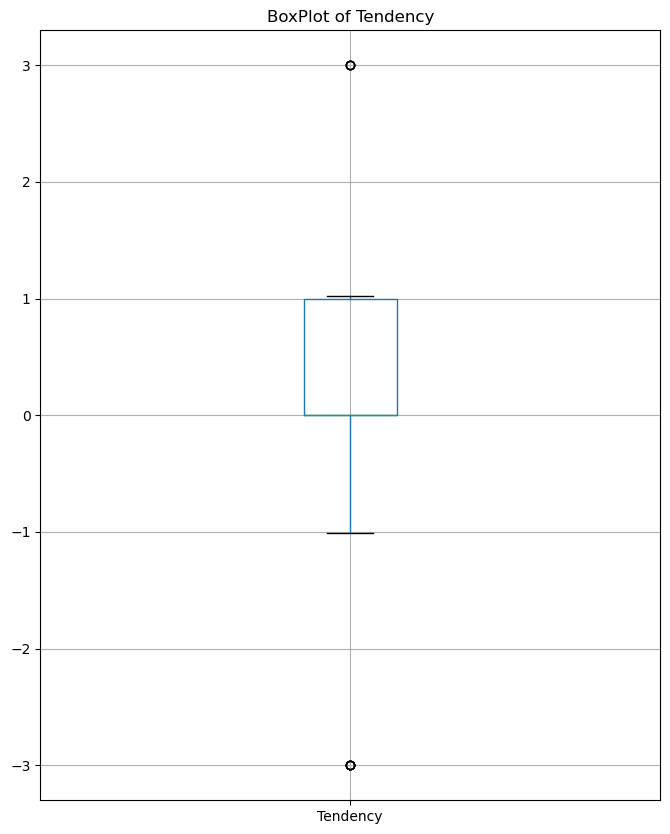

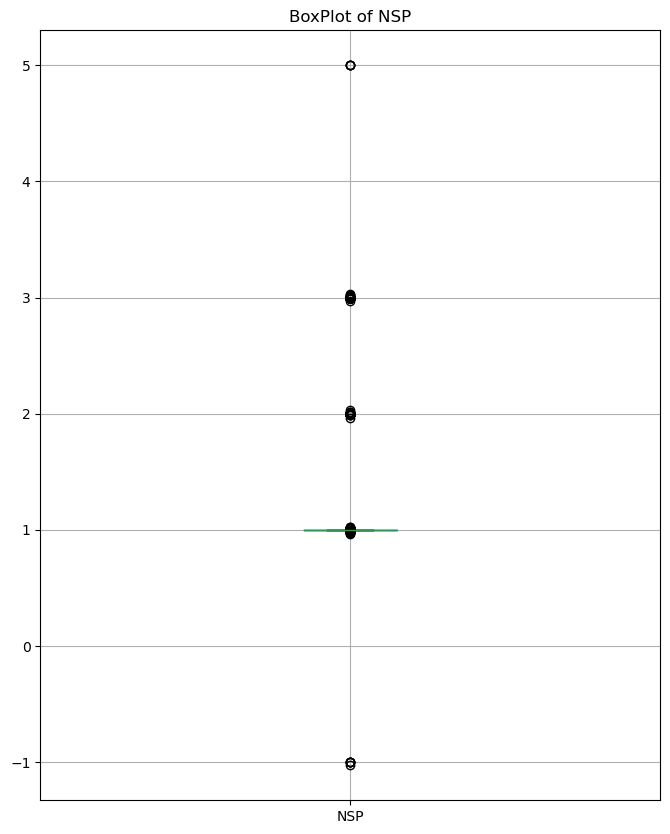

In [15]:
#Boxplots of numerical columns
for col in numerical_col:
    plt.figure(figsize=(8,10))
    plt.title(f'BoxPlot of {col}')
    data_clean.boxplot(column=[col])
    plt.show()

In [16]:
# Outlier detection using IQR
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5 * IQR)
    upper_range=Q3+(1.5 * IQR)
    return lower_range,upper_range

In [17]:
for col in numerical_col:
    lrincome,urincome=remove_outlier(data_clean[col])
    data_clean[col]=np.where(data_clean[col]>urincome,urincome,data_clean[col])
    data_clean[col]=np.where(data_clean[col]<lrincome,lrincome,data_clean[col])
data_clean.shape

(2124, 14)

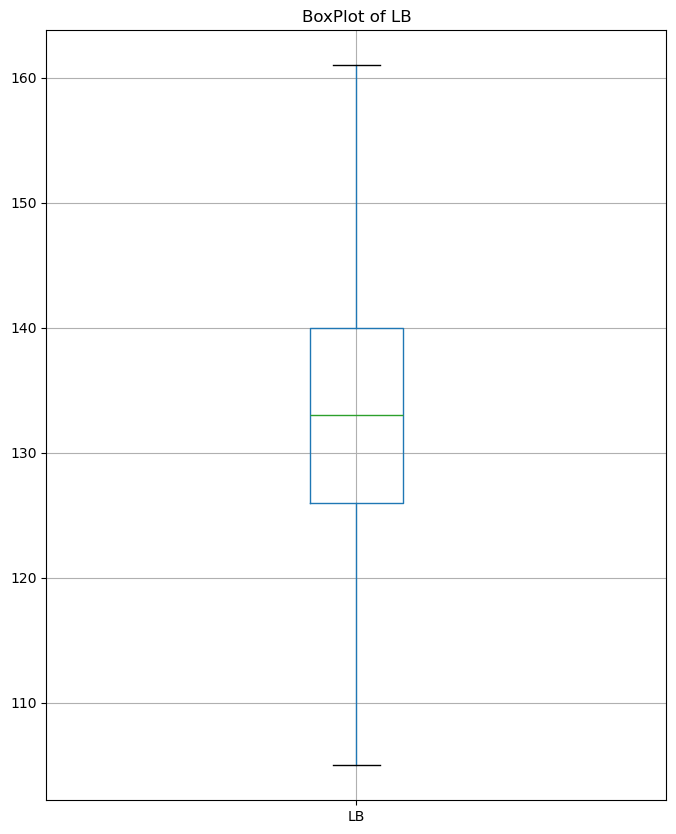

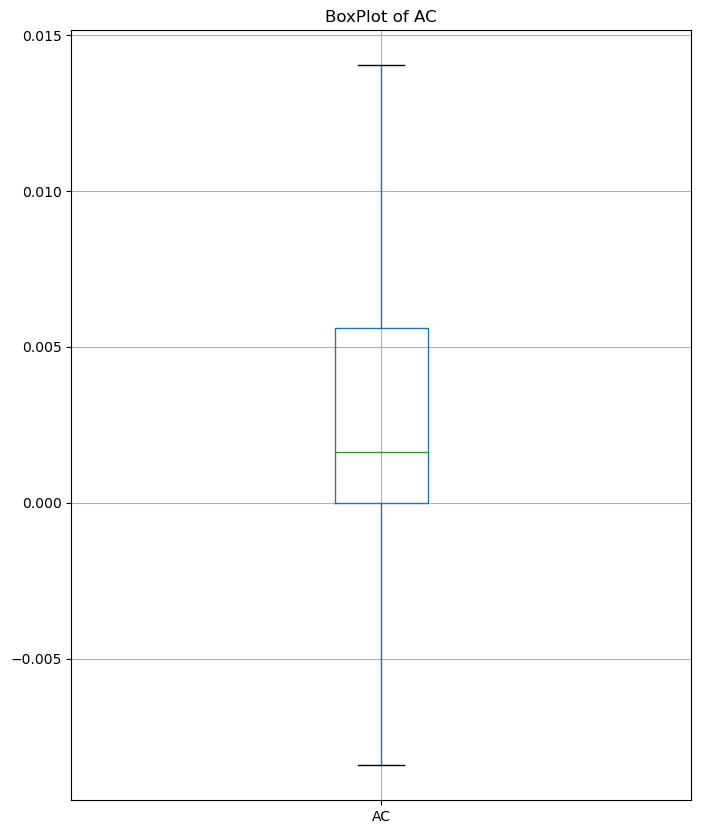

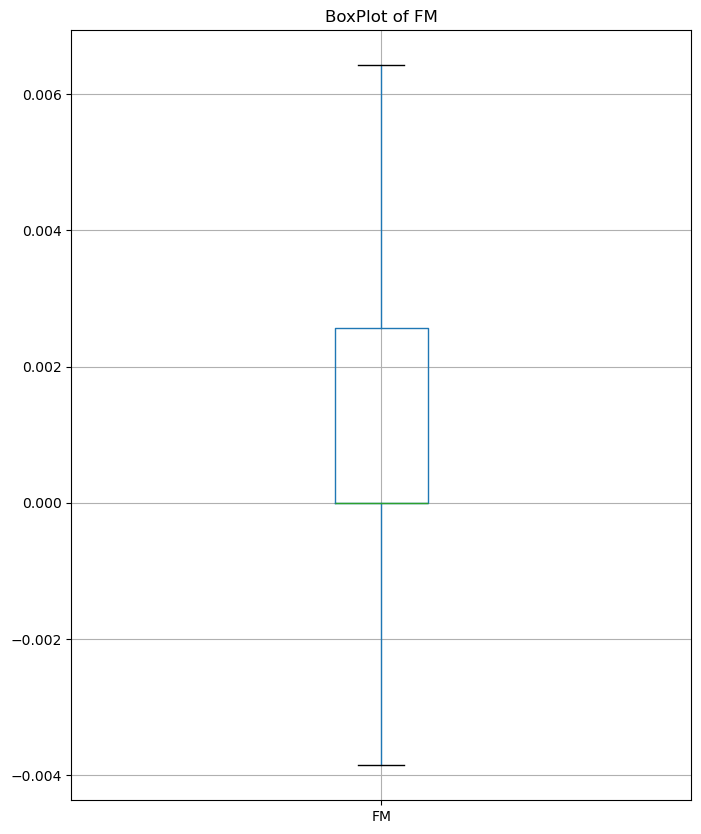

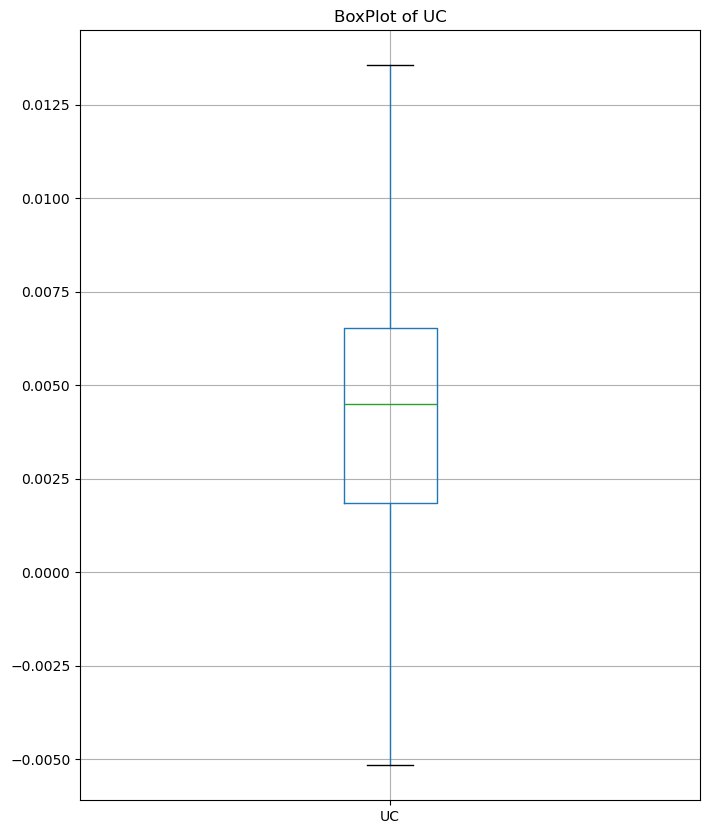

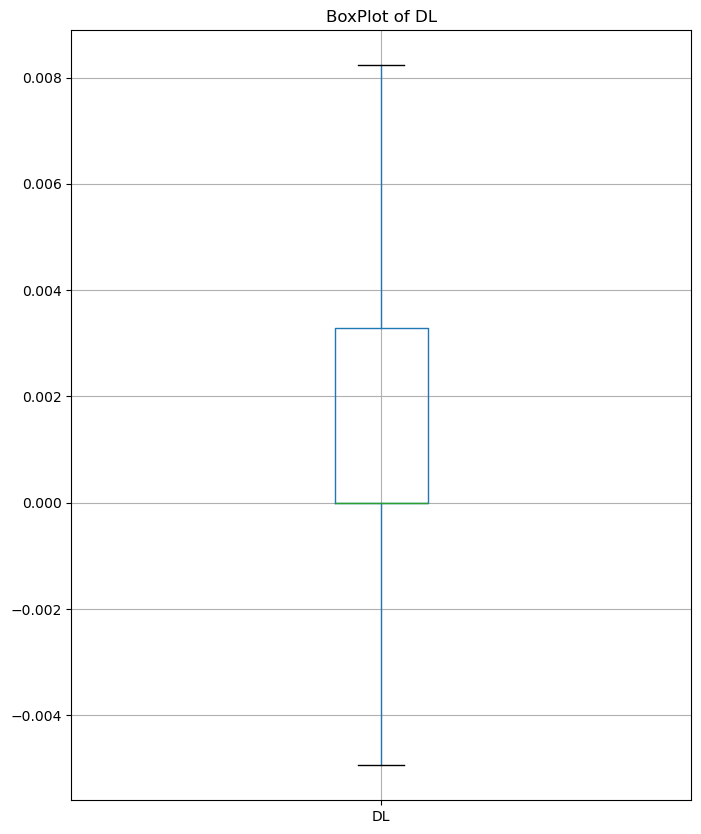

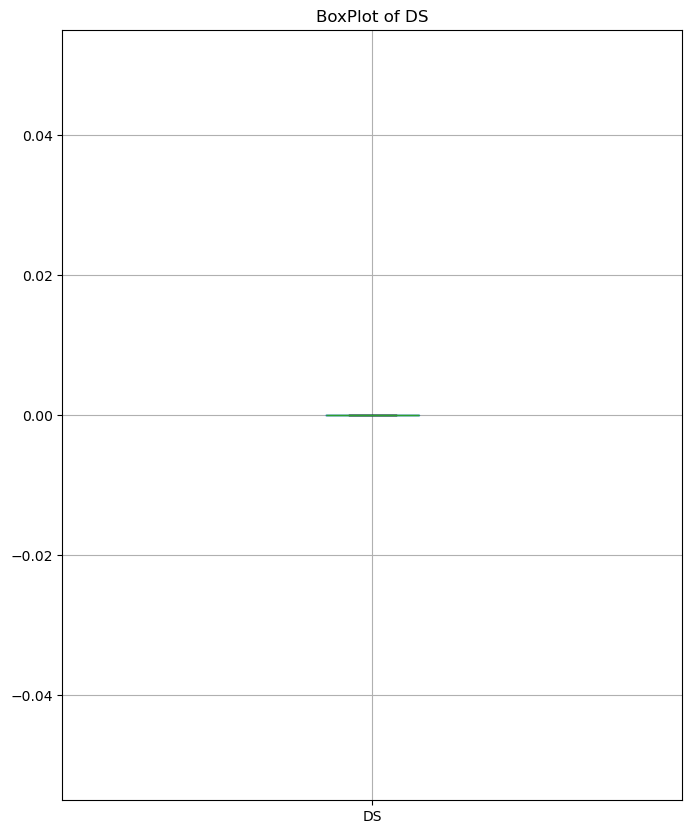

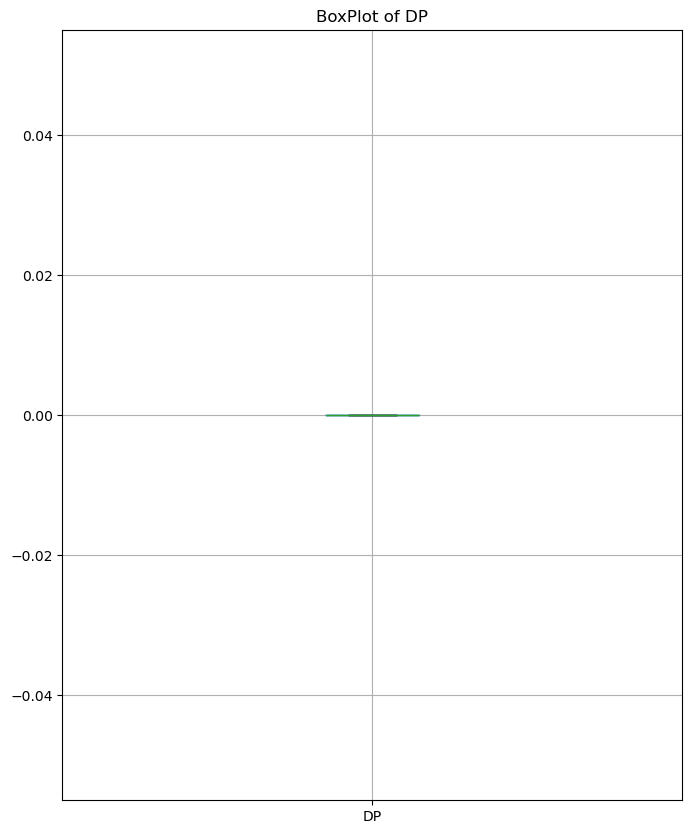

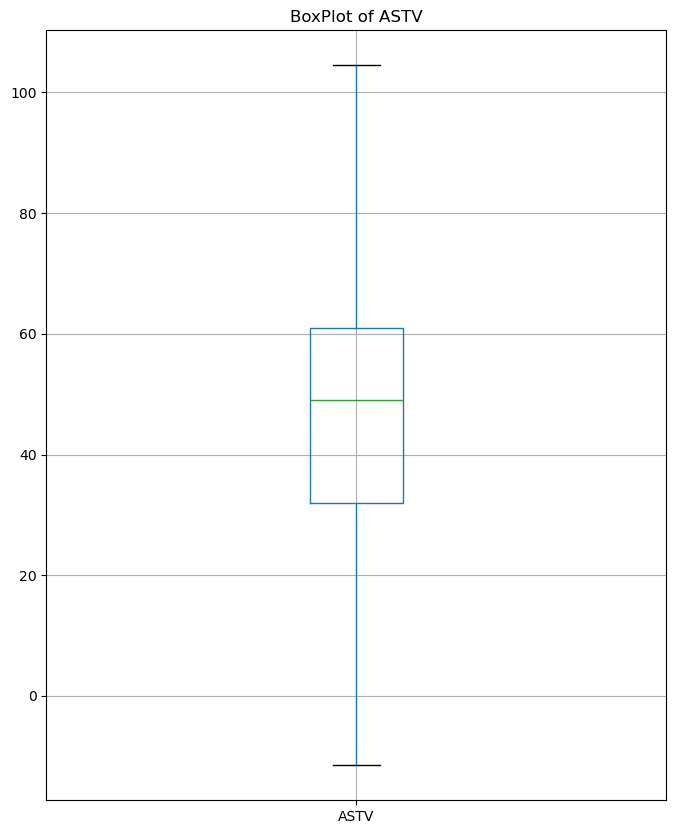

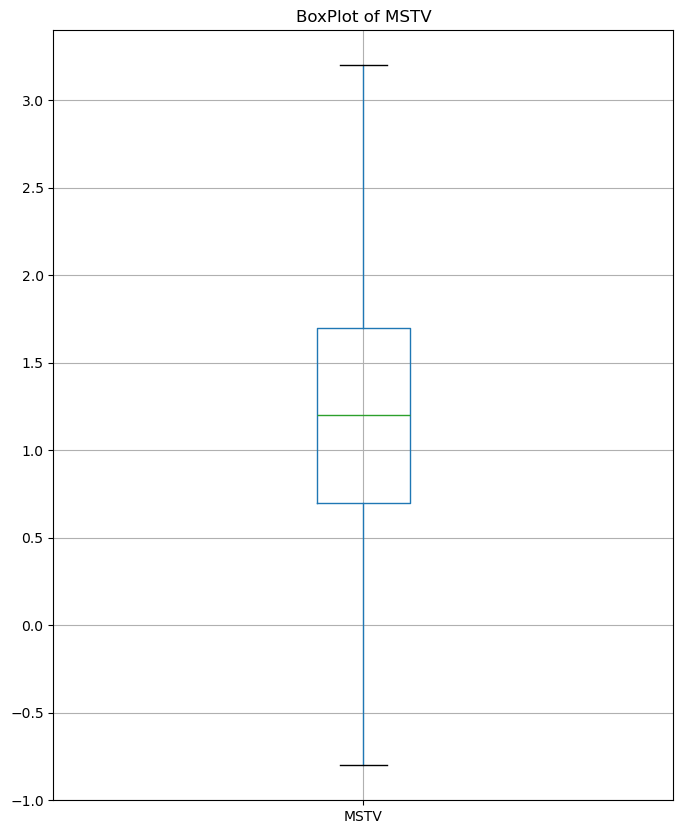

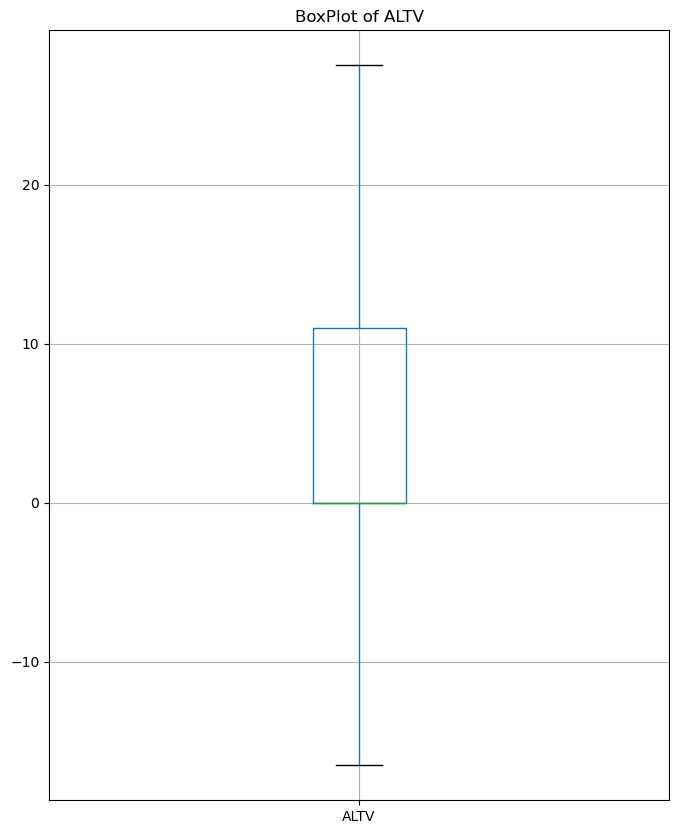

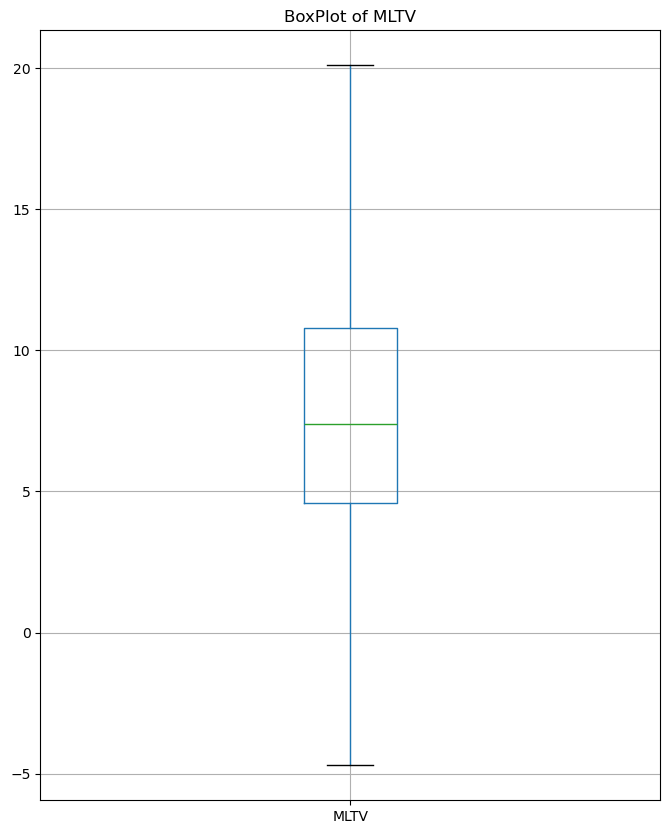

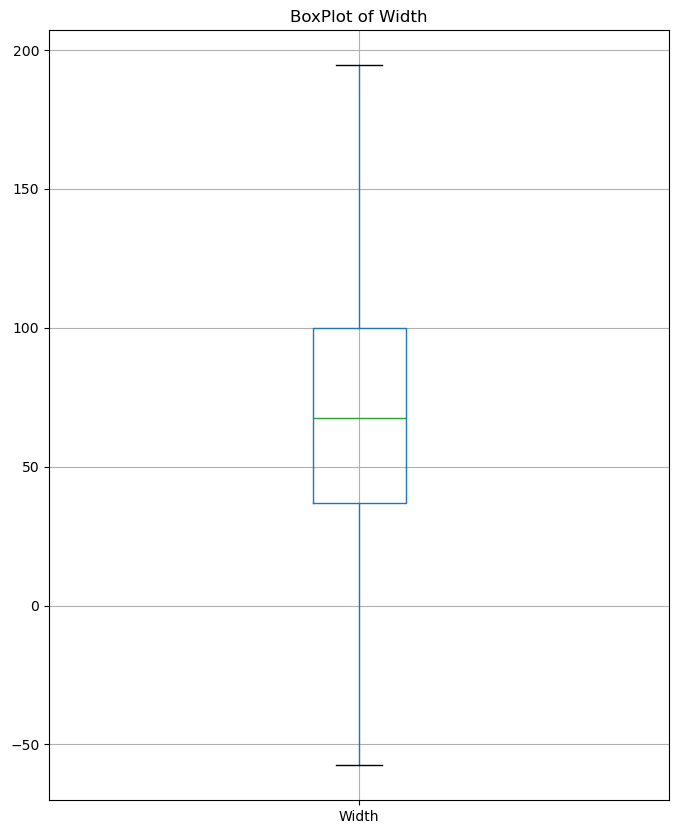

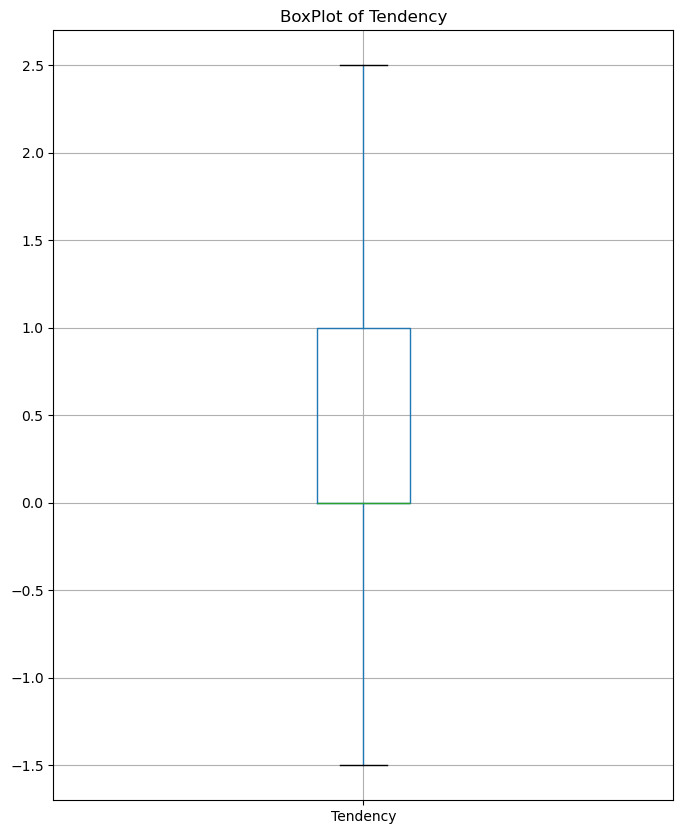

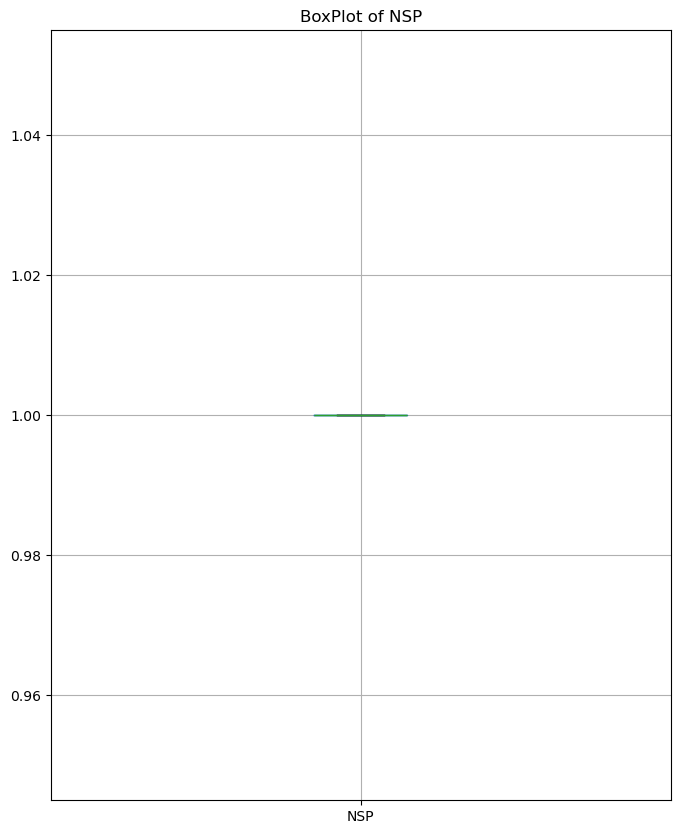

In [18]:
#After Outlier Detection
for col in numerical_col:
    plt.figure(figsize=(8,10))
    plt.title(f'BoxPlot of {col}')
    data_clean.boxplot(column=[col])
    plt.show()

# 2.Statistical Summary
We calculate mean, median, standard deviation

In [19]:
data_clean.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.0,2124.0,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.0
mean,133.288721,0.003133,0.001570,0.004365,0.001772,0.0,0.0,46.998334,1.304554,6.697979,8.002912,70.323356,0.316835,1.0
std,9.926790,0.003830,0.002487,0.003001,0.002670,0.0,0.0,17.609911,0.781303,10.381254,5.046792,39.577011,0.622623,0.0
min,105.000000,-0.008418,-0.003853,-0.005158,-0.004938,0.0,0.0,-11.500000,-0.800000,-16.500000,-4.700000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001634,0.000000,0.004486,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.400000,67.486468,0.000000,1.0
75%,140.000000,0.005612,0.002568,0.006536,0.003292,0.0,0.0,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.0
max,161.000000,0.014030,0.006421,0.013552,0.008230,0.0,0.0,104.500000,3.200000,27.500000,20.100000,194.500000,2.500000,1.0


# 3.Data Visualization
We explore distributions and relationships using multiple plots:
- Histograms
- Boxplots
- Correlation heatmap
- Pairplot
- Violin plots

## Histogram

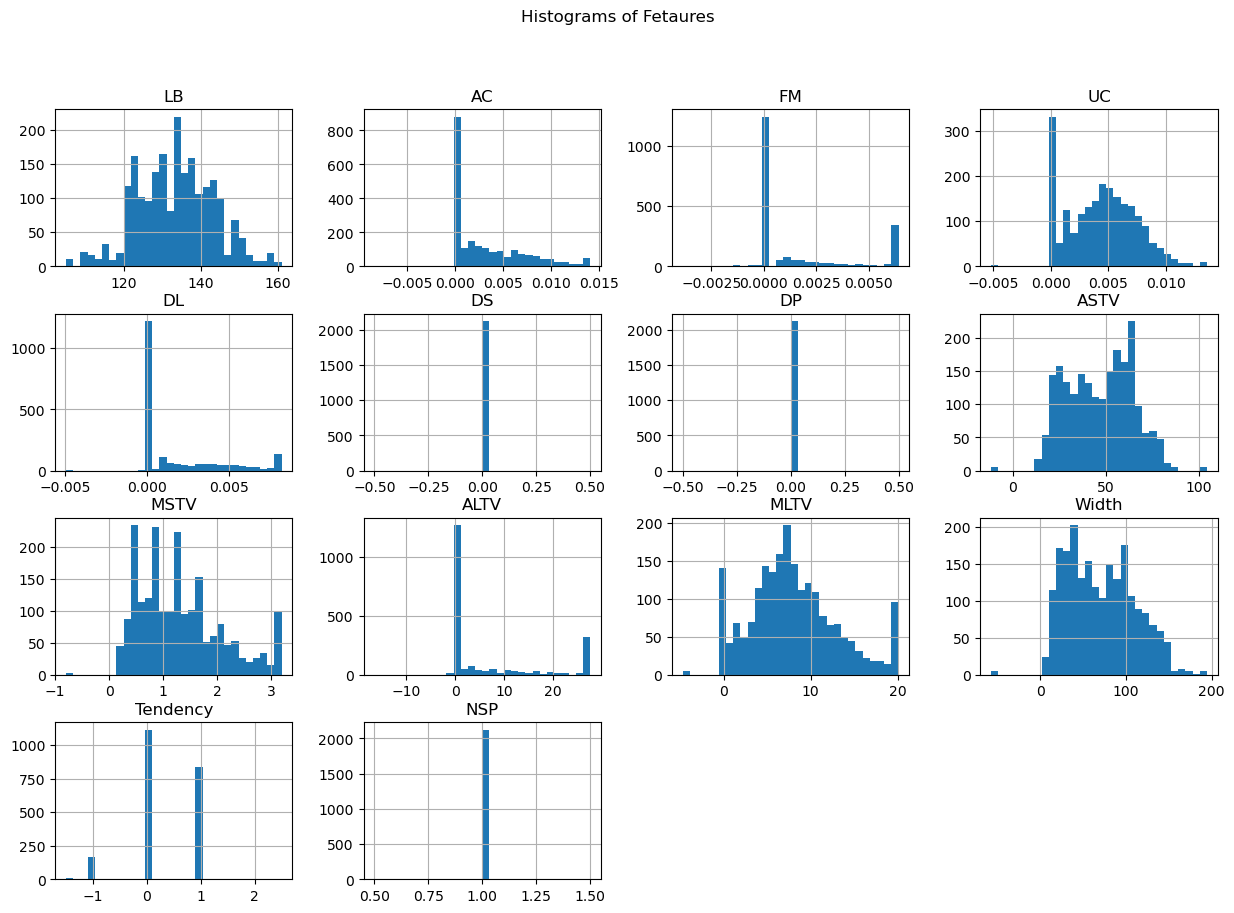

In [20]:
data_clean.hist(figsize=(15,10),bins=30)
plt.suptitle("Histograms of Fetaures")
plt.show()

## Boxplots

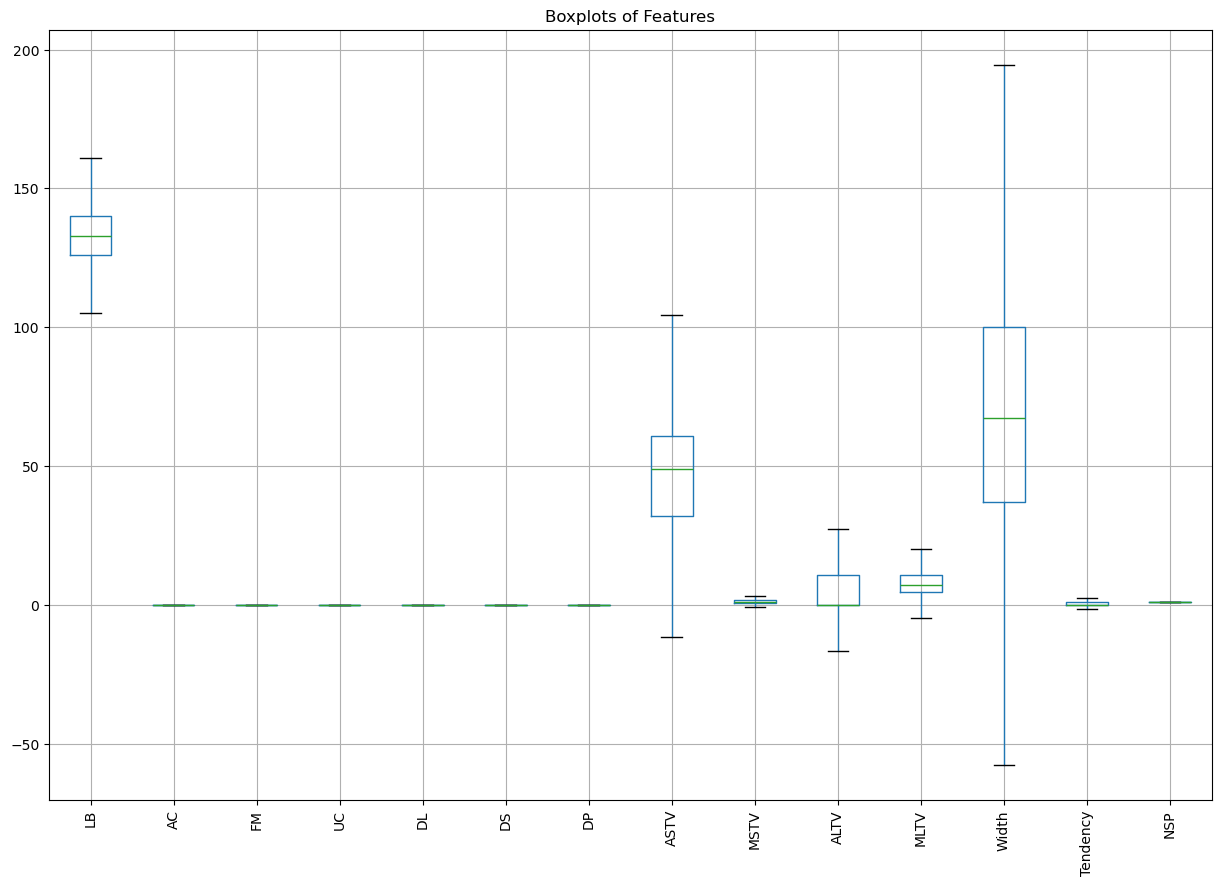

In [21]:
# Boxplots for each numeric variable
plt.figure(figsize=(15, 10))
data_clean.boxplot(rot=90)
plt.title("Boxplots of Features")
plt.show()

## Heatmap

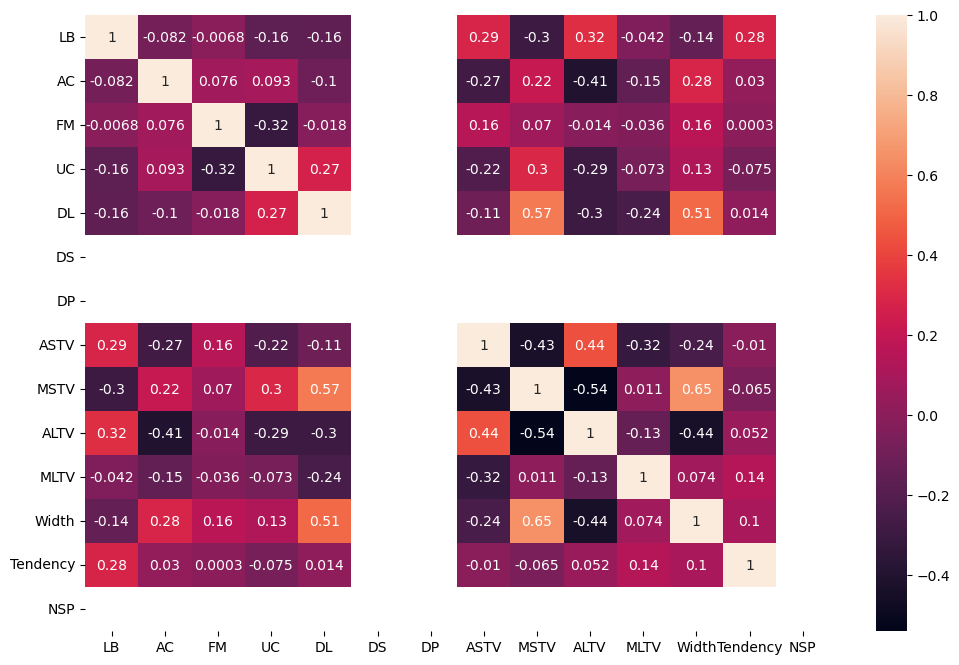

In [22]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data_clean.corr(),annot=True)
plt.show()

## Pairplot

<Figure size 2000x1000 with 0 Axes>

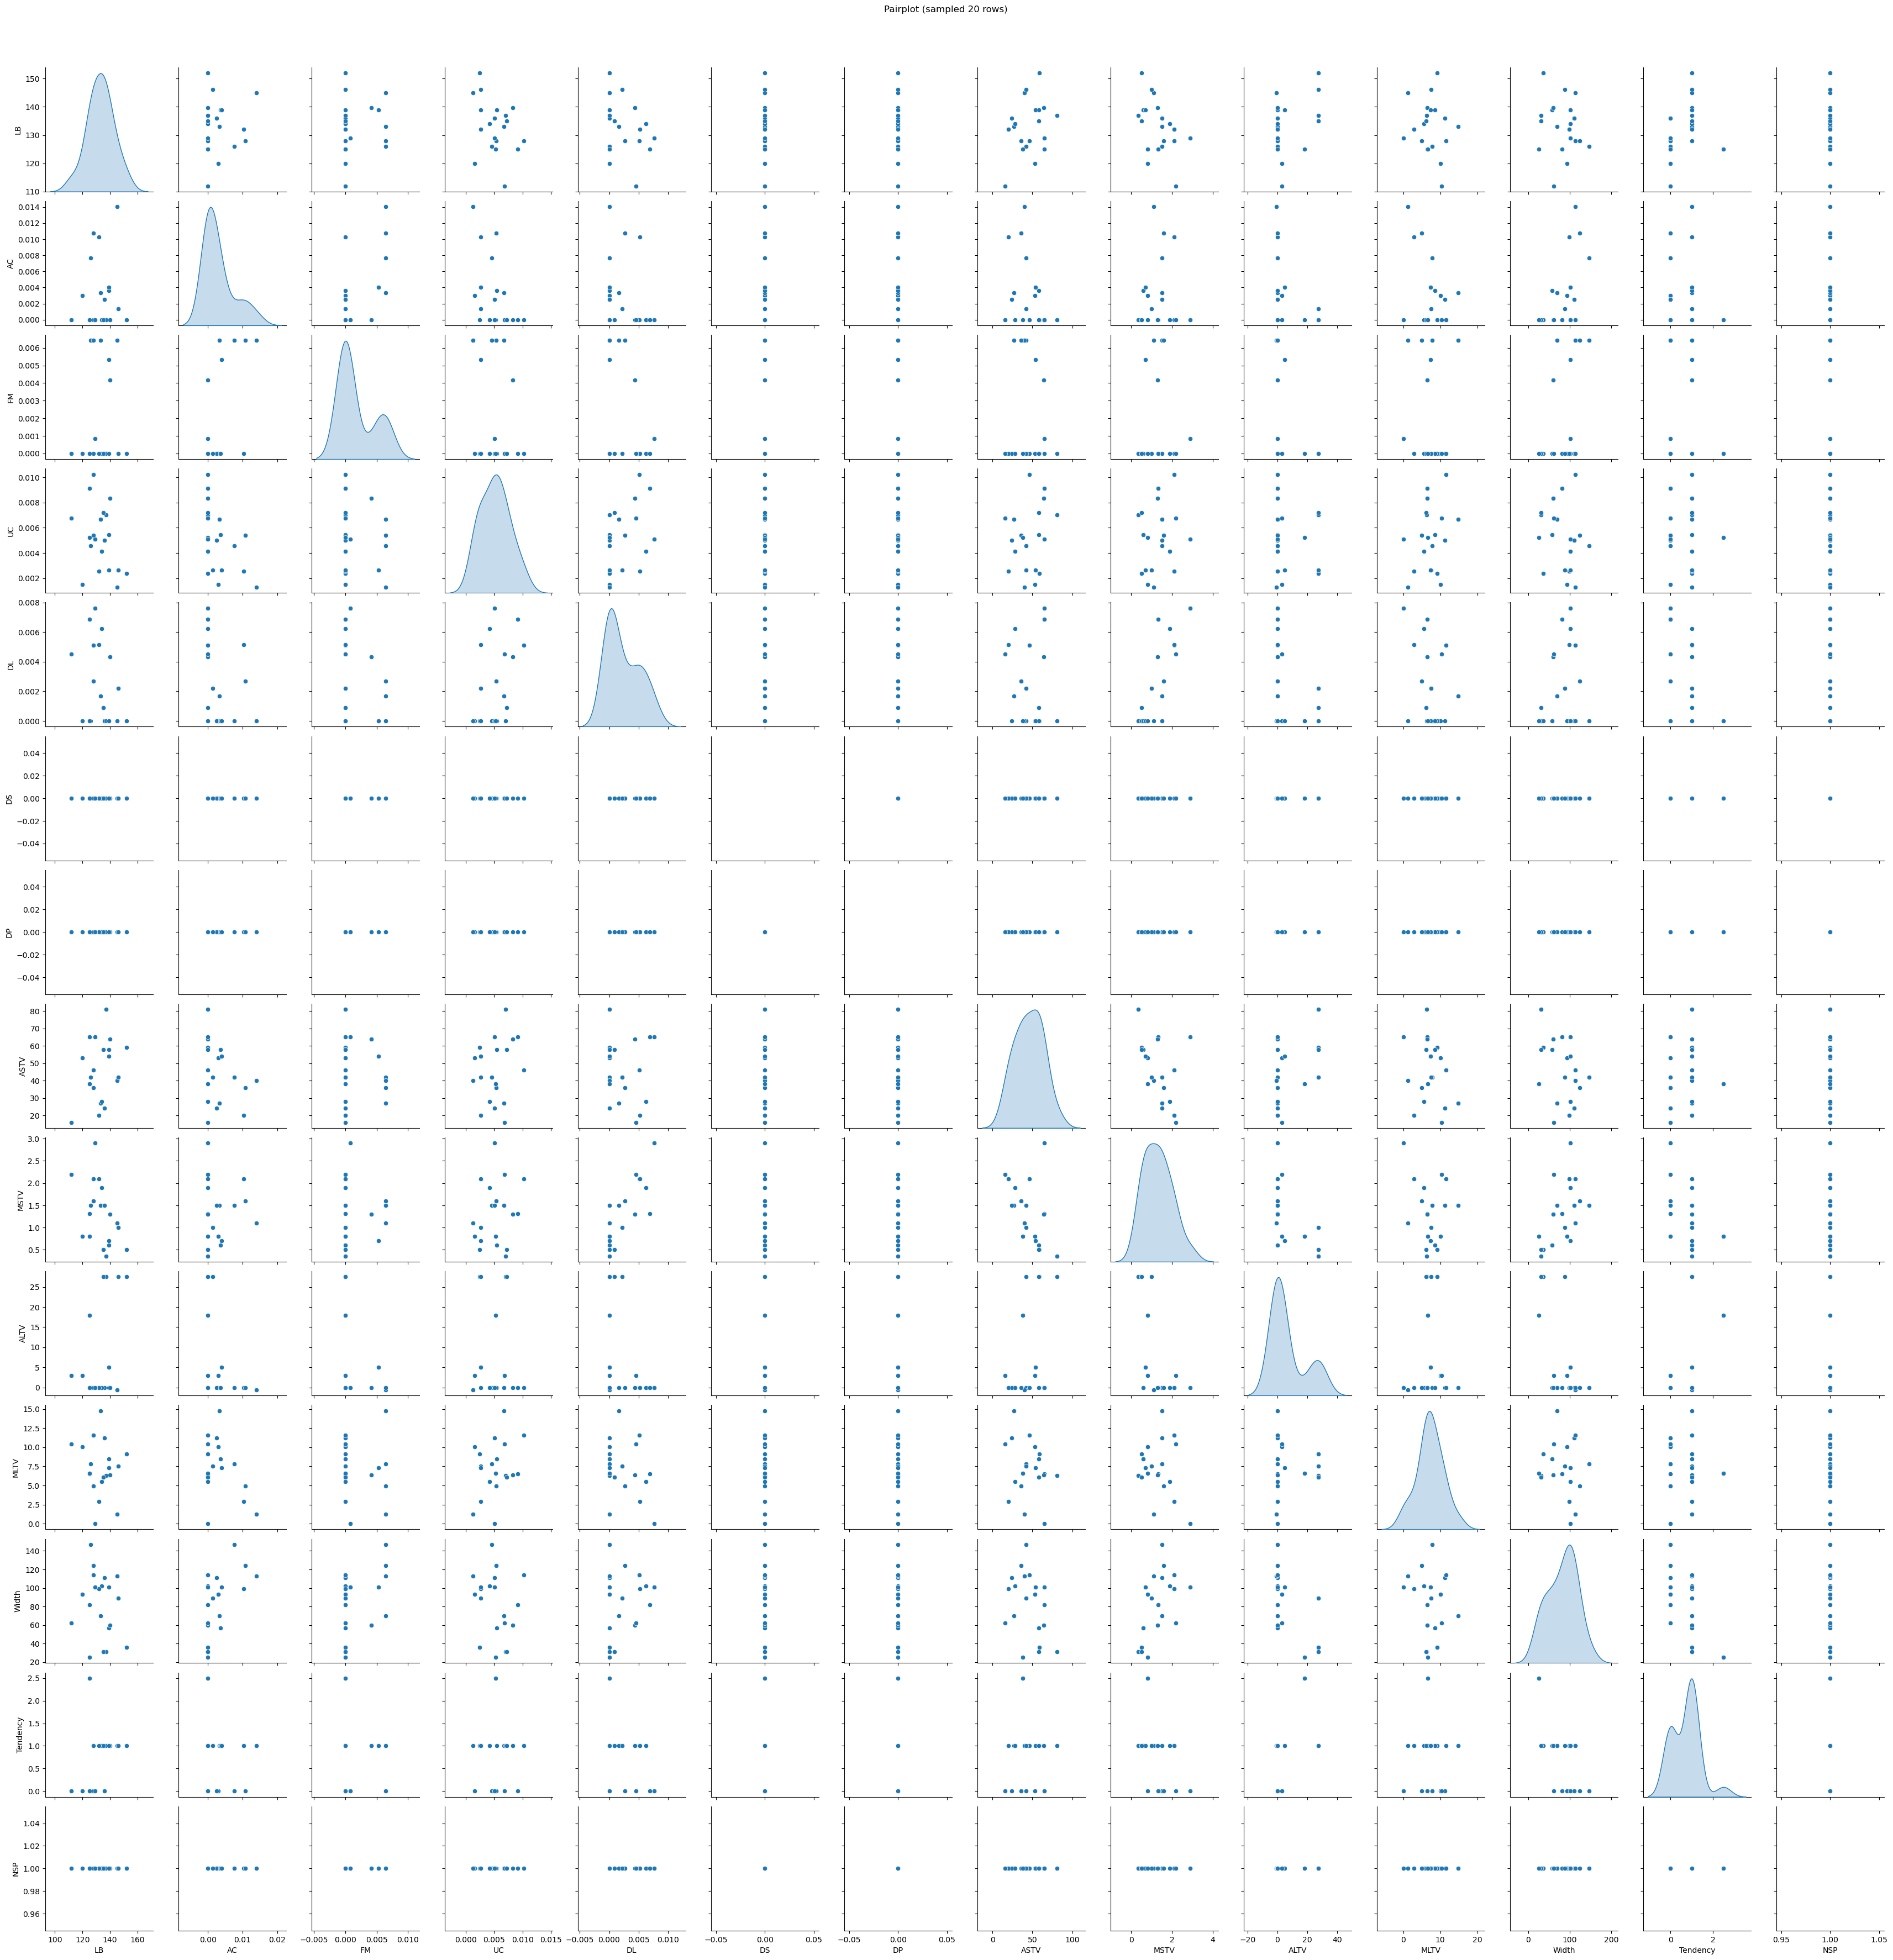

In [23]:
# Pairplot (using sample for speed)
plt.figure(figsize=(20, 10))
sns.pairplot(data_clean.sample(20), diag_kind="kde")
plt.suptitle("Pairplot (sampled 20 rows)", y=1.02)
plt.show()


## Violin Plot

<function matplotlib.pyplot.show(close=None, block=None)>

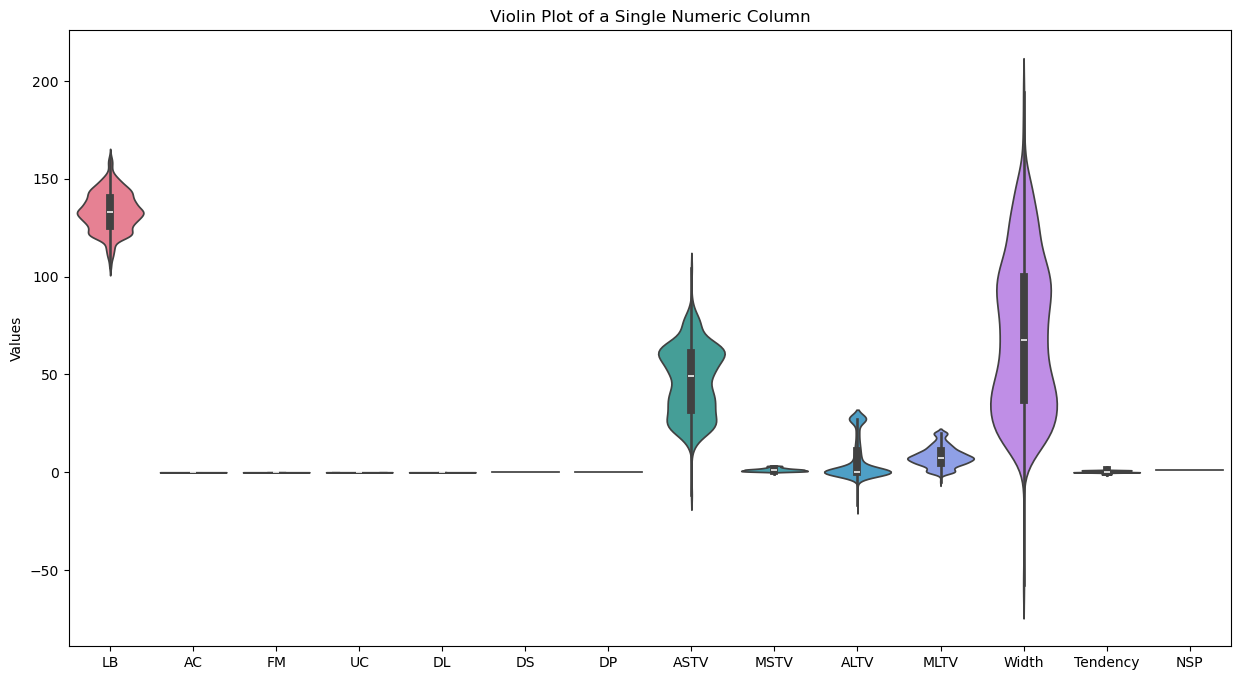

In [24]:
#Violin plots for selected variables
plt.figure(figsize=(15, 8))
sns.violinplot(data=data_clean)
# Add a title and labels for clarity
plt.title("Violin Plot of a Single Numeric Column")
plt.ylabel("Values")

# Display the plot
plt.show

# 4.Pattern Recognition and Insights

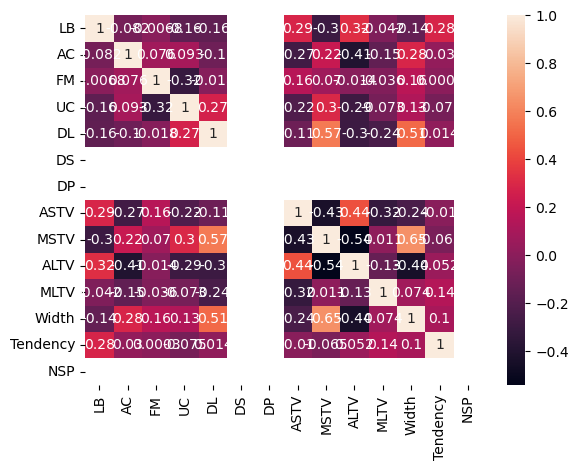

In [25]:
sns.heatmap(data_clean.corr(),annot=True)
plt.show()

## Correlations with Target Variable** (NSP – fetal state class)

**ASTV (Abnormal Short Term Variability):** 0.42 → moderately positive correlation.
⟶ Higher ASTV tends to be linked with abnormal fetal states.

**ALTV (Abnormal Long Term Variability):** 0.37 → also positively correlated with abnormal states.

**DP (Number of prolonged decelerations):** 0.29 → presence of prolonged decelerations indicates risk.

**LB (Baseline Fetal Heart Rate):** 0.13 → weak correlation, but higher heart rate may show stress.

**AC (Accelerations):** -0.32 → more accelerations are linked with normal fetal state.

**UC (Uterine Contractions):** -0.18 → stronger contractions often correlate with stress/abnormality.

**MSTV & MLTV (Variability measures):** slightly negative correlations, suggesting irregularity may worsen fetal state.



## General Patterns

**1.High Variability Measures (ASTV & ALTV)** → Strong indicators of abnormal or pathological fetal conditions.


**2.Accelerations (AC)** → Protective marker; more accelerations are strongly linked with normal states.

**3. Prolonged Decelerations (DP)** → Increase the likelihood of abnormal fetal state.


**4. Uterine Contractions (UC)** → More frequent contractions tend to push towards abnormal outcomes.


## Trends Over Time

- The dataset doesn’t have explicit temporal data (like timestamps), but some variables (AC, UC, ASTV, ALTV) are time-based recordings of fetal heart activity.

- Rising ASTV/ALTV values over monitoring periods could signal worsening fetal conditions.

- Stable or frequent accelerations (AC) across time indicate healthier patterns.
